## Slope of Regression with Outliers

slope = 5.077930643440256


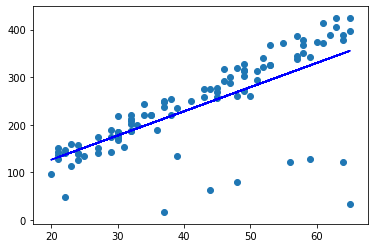

In [6]:
import sys
sys.path.append("/home/cit5/Downloads/ud120-projects-master/tools/")
sys.path.append('/home/cit5/Downloads/ud120-projects-master/choose_your_own')
sys.path.append('/home/cit5/Downloads/ud120-projects-master/datasets_questions')

import os
os.chdir('/home/cit5/Downloads/ud120-projects-master/outliers')

import random
import numpy
import matplotlib.pyplot as plt
import pickle

from outlier_cleaner import outlierCleaner


### load up some practice data with outliers in it
ages = pickle.load( open("practice_outliers_ages.pkl", "rb") )
net_worths = pickle.load( open("practice_outliers_net_worths.pkl", "rb") )

### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
from sklearn.model_selection import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)


# fit a linear regression
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(ages_train, net_worths_train)

print ('slope = {0}'.format(reg.coef_[0][0]))


%matplotlib inline
plt.plot(ages, reg.predict(ages), color="blue")
plt.scatter(ages, net_worths)

## Score of Regression with Outliers

In [7]:
print ('score = {0}'.format(reg.score(ages_test, net_worths_test)))

score = 0.8782624703664671


## Slope After Cleaning

new slope = 6.368594806943666


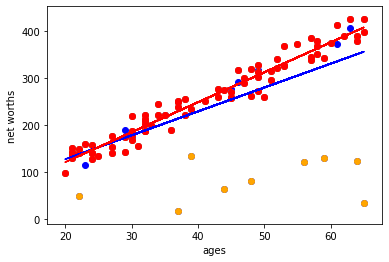

In [8]:
def outlierCleaner(predictions, ages, net_worths):
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).

        Return a list of tuples named cleaned_data where 
        each tuple is of the form (age, net_worth, error).
    """
    errors = net_worths-predictions
    threshold = numpy.percentile(numpy.absolute(errors), 90)
    #print threshold
    #print numpy.max(numpy.absolute(errors))
    #print numpy.sort(numpy.absolute(errors), axis=0)
    
    cleaned_data = [(age, net_worth, error) for age, net_worth, error in zip(ages, net_worths, errors) if abs(error) <= threshold]
    
    return cleaned_data

reg = linear_model.LinearRegression()
reg.fit(ages_train, net_worths_train)

plt.plot(ages, reg.predict(ages), color='blue')

# plot all points in blue
plt.scatter(ages, net_worths, color='blue')

# plot the current training points in orange
plt.scatter(ages_train, net_worths_train, color='orange')

### identify and remove the most outlier-y points
predictions = reg.predict(ages_train)
cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )


### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    # the non-outlier ages, net worths, and errors
    ages_train2, net_worths_train2, errors_train2 = zip(*cleaned_data)
    ages_train2       = numpy.reshape( numpy.array(ages_train2), (len(ages_train2), 1))
    net_worths_train2 = numpy.reshape( numpy.array(net_worths_train2), (len(net_worths_train2), 1))

    # refit the cleaned data
    reg2 = linear_model.LinearRegression()
    reg2.fit(ages_train2, net_worths_train2)
    plt.plot(ages, reg2.predict(ages), color='red')
    plt.scatter(ages_train2, net_worths_train2, color='red')
    plt.xlabel("ages")
    plt.ylabel("net worths")

else:
    print ("outlierCleaner() is returning an empty list, no refitting to be done")
    
    
print ('new slope = {0}'.format(reg2.coef_[0][0]))

## Score After Cleaning

In [9]:
print ('new score = {0}'.format(reg2.score(ages_test, net_worths_test)))

new score = 0.983189455395532


## Enron Outliers

TOTAL


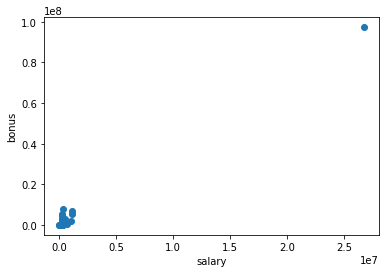

In [20]:
from feature_format import featureFormat, targetFeatureSplit

### read in data dictionary, convert to numpy array
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "rb") )
features = ["salary", "bonus"]
data = featureFormat(data_dict, features)

plt.scatter(data[:,0], data[:,1])
plt.xlabel("salary")
plt.ylabel("bonus")

import pandas as pd
df = pd.DataFrame(data_dict)
df.loc['salary',:] = pd.to_numeric(df.loc['salary',:], errors='coerce')
df.loc['bonus',:] = pd.to_numeric(df.loc['bonus',:], errors='coerce')
x = df.loc['salary',:].astype('float64')
print(x.idxmax(axis=1))

## Any More Outliers?

Text(0, 0.5, 'bonus')

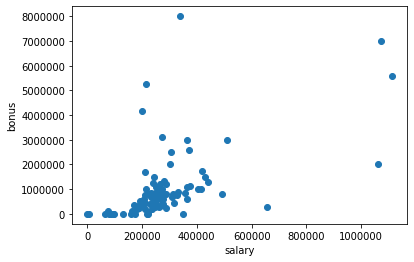

In [21]:
data_dict.pop('TOTAL', 0)

data = featureFormat(data_dict, features)

plt.scatter(data[:,0], data[:,1])
plt.xlabel("salary")
plt.ylabel("bonus")

## Identifying Two More Outliers

In [23]:
#print df.columns[name wdf.loc['salary',:] > 1*10**6 and df.loc['bonus',:] > 5*10**6]
print ([name for name in df.columns if df.loc['salary', name] > 10**6 and df.loc['bonus',name] > 5*10**6])

['LAY KENNETH L', 'SKILLING JEFFREY K', 'TOTAL']
